Se importa pandas

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons, make_classification



In [6]:
df = pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
original_df = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


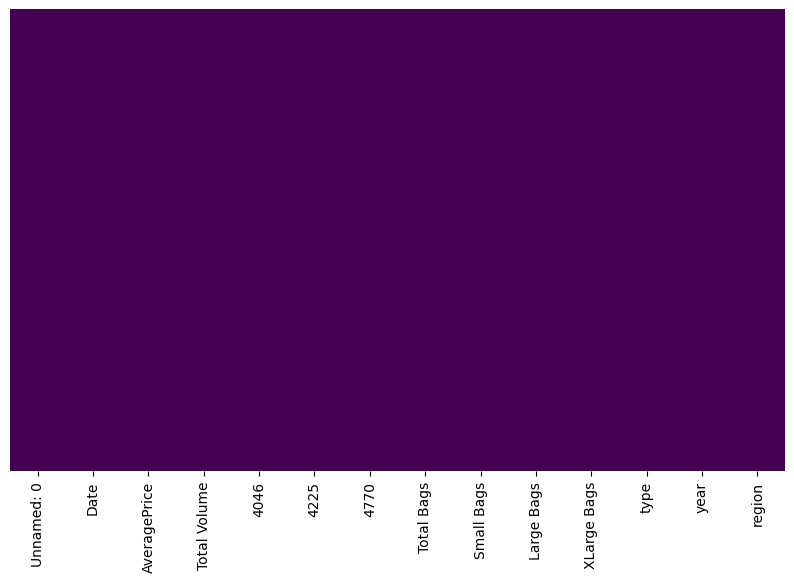

In [9]:
# Visualización de valores nulos
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

Podemos visualizar que el dataFrame no tiene valores nulos

In [10]:
#cambio de nombre de columna Unnamed: 0 a index
df.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


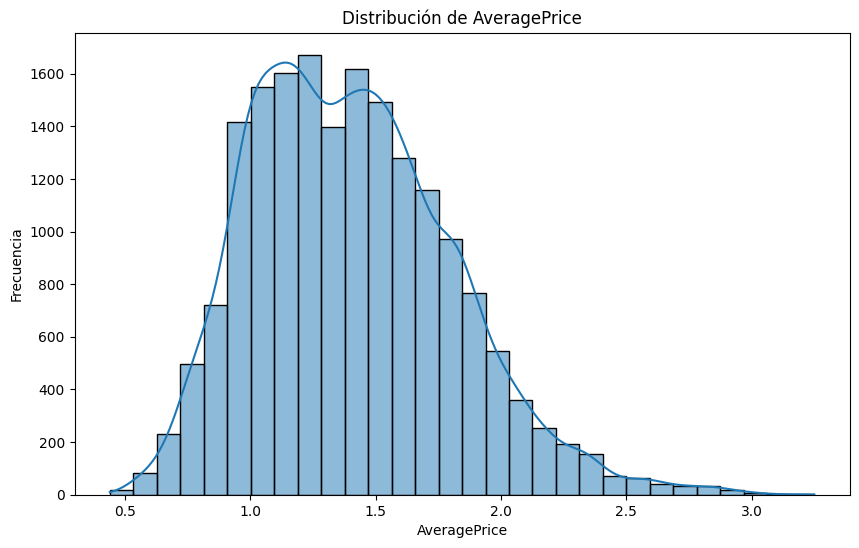

In [11]:
# Histograma de la variable 'AveragePrice'
plt.figure(figsize=(10,6))
sns.histplot(df['AveragePrice'], bins=30, kde=True)
plt.title('Distribución de AveragePrice')
plt.xlabel('AveragePrice')
plt.ylabel('Frecuencia')
plt.show()

El histograma muestra que la distribución del precio promedio (`AveragePrice`) de los datos es asimétrica a la derecha, con la mayoría de los valores concentrados entre $1.00 y $1.50, lo que indica que ese es el rango de precios más común para el producto analizado. A medida que el precio aumenta, la frecuencia disminuye, aunque existen algunos casos con precios superiores a $2.00 e incluso por encima de $3.00, los cuales son poco frecuentes y podrían deberse a situaciones estacionales o mercados específicos. En general, la dispersión es moderada, y la curva KDE sugiere una única moda sin presencia clara de múltiples picos.

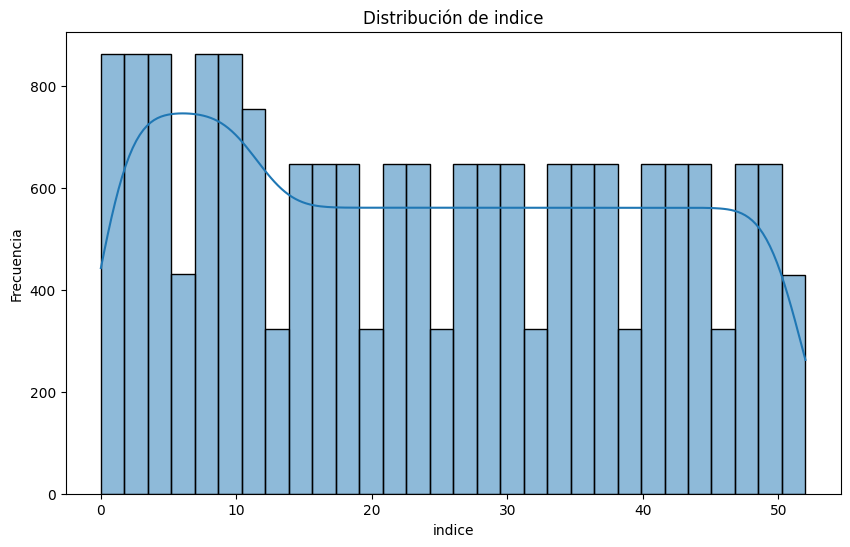

In [12]:
# Histograma de la variable 'indice'
plt.figure(figsize=(10,6))
sns.histplot(df['index'], bins=30, kde=True)
plt.title('Distribución de indice')
plt.xlabel('indice')
plt.ylabel('Frecuencia')
plt.show()

El histograma de la distribución del `index` muestra una frecuencia variable a lo largo de los valores, con una mayor concentración de datos en los primeros tramos (especialmente entre 0 y 15), lo que sugiere que los primeros registros del DataFrame contienen más observaciones que los posteriores. A partir del índice 20 en adelante, la distribución se estabiliza con una frecuencia relativamente constante. Esto indica que el índice ha sido probablemente agrupado o transformado, ya que un índice normal no presentaría repeticiones. El gráfico sugiere un posible desbalance en la distribución de datos a lo largo del conjunto, lo cual podría estar relacionado con el orden temporal, regional u otro criterio de segmentación aplicado al DataFrame.

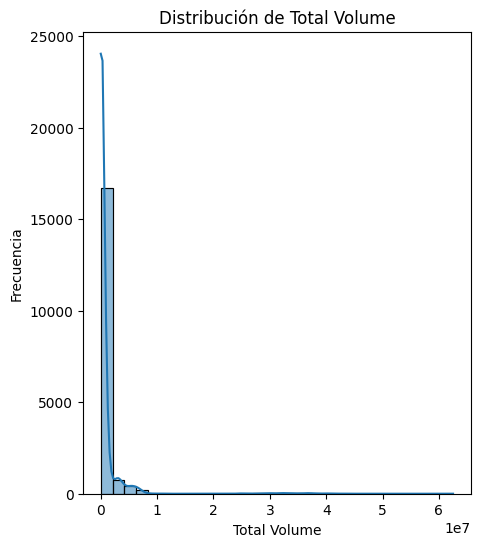

In [13]:
# Histograma de la variable 'total Volume'
plt.figure(figsize=(5,6))
sns.histplot(df['Total Volume'], bins=30, kde=True)
plt.title('Distribución de Total Volume')
plt.xlabel('Total Volume')
plt.ylabel('Frecuencia')
plt.show()


El histograma de la variable `Total Volume` muestra una distribución altamente sesgada a la derecha, con una gran concentración de observaciones en los valores más bajos del eje x. La mayoría de los registros tienen un volumen total relativamente bajo, mientras que existen pocos casos con volúmenes extremadamente altos (outliers), que estiran la cola derecha de la distribución hasta más de 60 millones. Esta asimetría indica que, en general, se comercializan cantidades moderadas del producto, pero en ciertos eventos o regiones específicas se registran volúmenes inusualmente altos, lo cual podría estar asociado a mercados mayoristas, temporadas pico o errores en los datos.

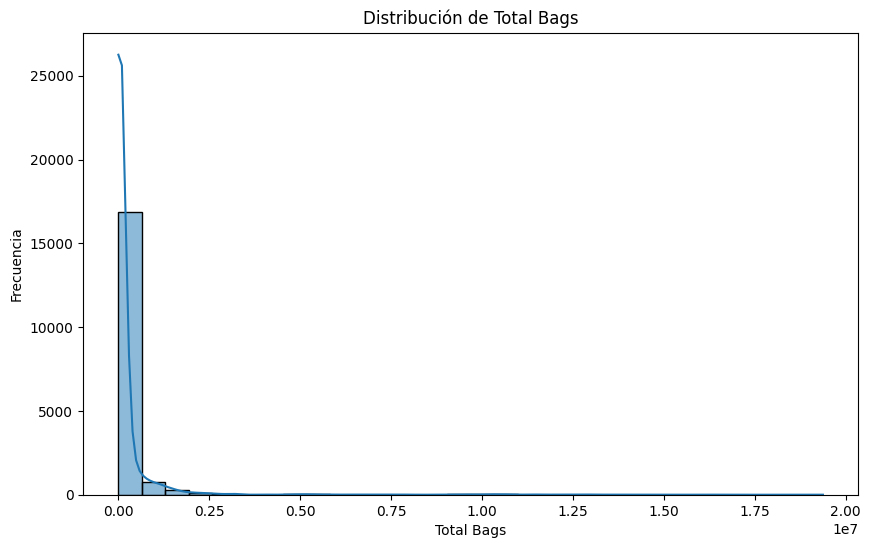

In [14]:
# Histograma de la variable 'Total Bags'
plt.figure(figsize=(10,6))
sns.histplot(df['Total Bags'], bins=30, kde=True)
plt.title('Distribución de Total Bags')
plt.xlabel('Total Bags')
plt.ylabel('Frecuencia')
plt.show()

El histograma de la variable `Total Bags` revela una distribución fuertemente sesgada a la derecha, con la gran mayoría de los datos concentrados en valores bajos, especialmente por debajo de los 2 millones. Esto indica que en la mayoría de los casos, la cantidad total de bolsas comercializadas es relativamente baja. Sin embargo, existe una larga cola que se extiende hasta cerca de los 20 millones, evidenciando la presencia de valores atípicos o casos excepcionales con volúmenes muy altos.

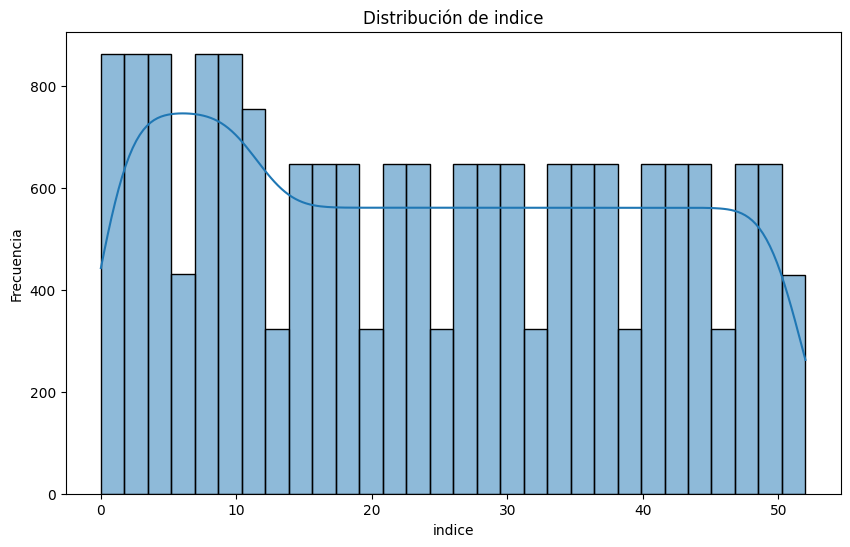

In [15]:
# Histograma de la variable 'indice'
plt.figure(figsize=(10,6))
sns.histplot(df['index'], bins=30, kde=True)
plt.title('Distribución de indice')
plt.xlabel('indice')
plt.ylabel('Frecuencia')
plt.show()

El histograma de la variable `indice` muestra una distribución con ciertas fluctuaciones, donde los valores más bajos (entre 0 y 15) presentan frecuencias ligeramente más altas en comparación con el resto del rango. A partir de ahí, la frecuencia se mantiene relativamente constante con una ligera tendencia descendente hacia el final. Esto sugiere que los datos pueden estar agrupados en bloques o categorías, y no distribuidos de forma totalmente uniforme. La curva KDE también evidencia una leve concentración en los primeros tramos, lo que podría reflejar una mayor presencia de registros en las primeras posiciones del DataFrame, posiblemente por orden temporal, geográfico u otro criterio de segmentación.

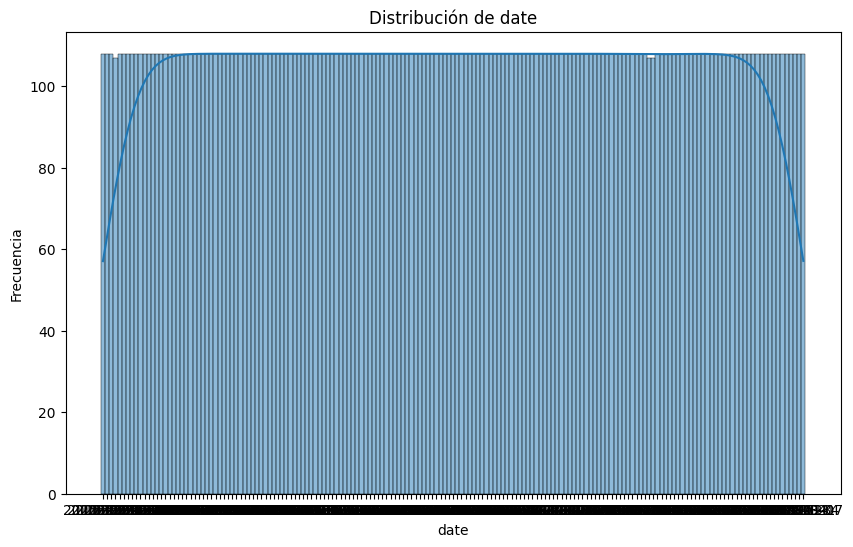

In [16]:
# Histograma de la variable 'date'
plt.figure(figsize=(10,6))
sns.histplot(df['Date'], bins=10, kde=True)
plt.title('Distribución de date')
plt.xlabel('date')
plt.ylabel('Frecuencia')
plt.show()

El histograma de la variable `date` muestra una distribución prácticamente uniforme en la mayoría del rango temporal, con una frecuencia constante cercana a los 110 registros por fecha. Esto indica que la recolección de datos fue regular durante el periodo analizado, probablemente con una entrada diaria o semanal por cada región o tipo de producto. Solo se observan ligeras caídas en los extremos del eje temporal, lo cual es común al inicio y final de una serie de datos cuando todavía no se han alcanzado o mantenido los ritmos de recolección. La uniformidad sugiere un buen equilibrio en la cobertura temporal del dataset.

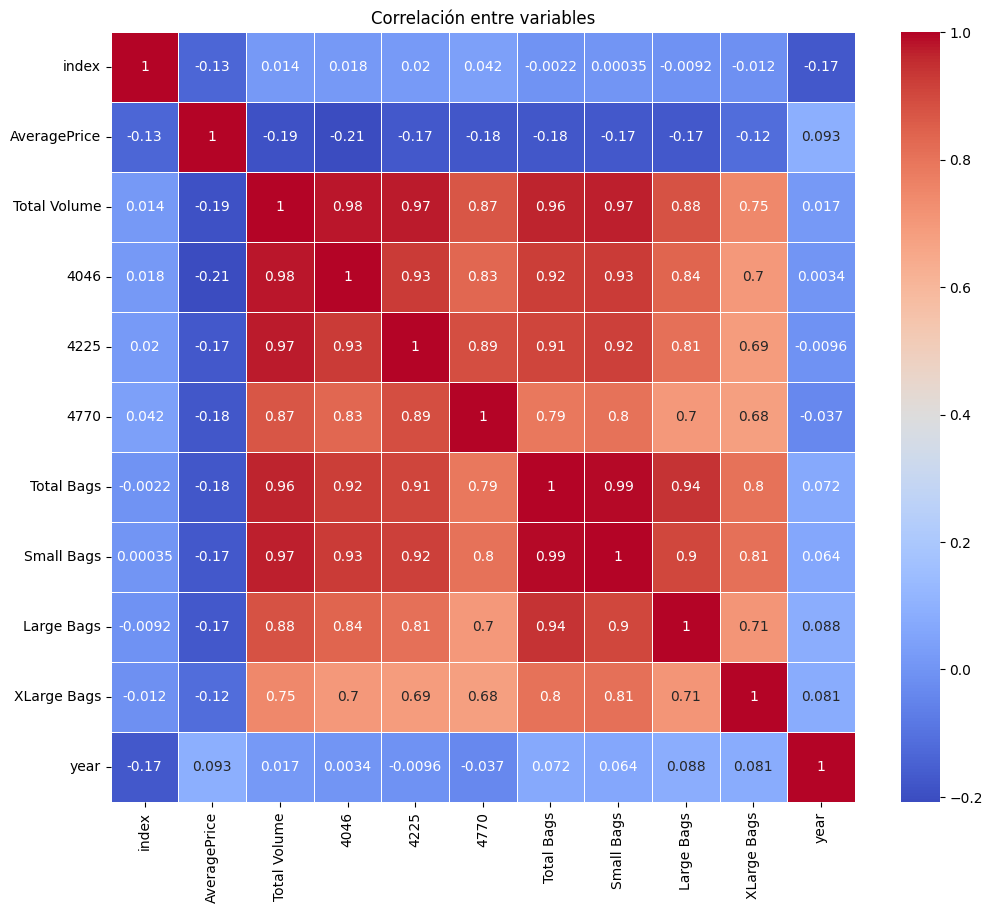

In [17]:
#correlación entre variables
plt.figure(figsize=(12,10))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlación entre variables')
plt.show()

El mapa de calor de correlación entre variables muestra relaciones significativas dentro del conjunto de datos. Se observa una fuerte correlación positiva entre Total Volume y las variables 4046, 4225, y 4770 (todas mayores a 0.95), lo cual tiene sentido ya que estos valores representan distintos tipos de aguacates y componen el volumen total. Asimismo, Total Bags está altamente correlacionado con Small Bags, Large Bags y XLarge Bags, lo que también es coherente, pues estas subcategorías forman parte del total. Por otro lado, AveragePrice presenta una correlación negativa débil con la mayoría de las variables, lo que sugiere que el precio promedio tiende a disminuir ligeramente cuando aumenta el volumen o cantidad de producto. 

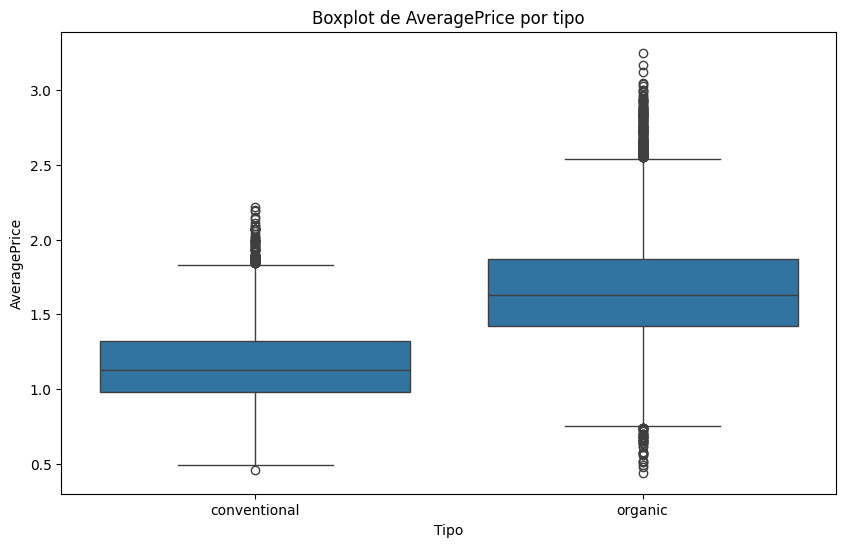

In [18]:
#boxplot de type y AveragePrice
plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='AveragePrice', data=df)
plt.title('Boxplot de AveragePrice por tipo')
plt.xlabel('Tipo')
plt.ylabel('AveragePrice')
plt.show()

La gráfica muestra un boxplot del precio promedio (AveragePrice) de los aguacates segmentado por tipo: convencional y orgánico. Se observa que los aguacates orgánicos tienen, en general, un precio promedio más alto que los convencionales, ya que su mediana está notablemente por encima. Además, el rango intercuartílico (IQR) de los orgánicos es mayor, lo que indica una mayor dispersión en sus precios. También se evidencian muchos valores atípicos (outliers) en ambos tipos, especialmente en los precios más altos.

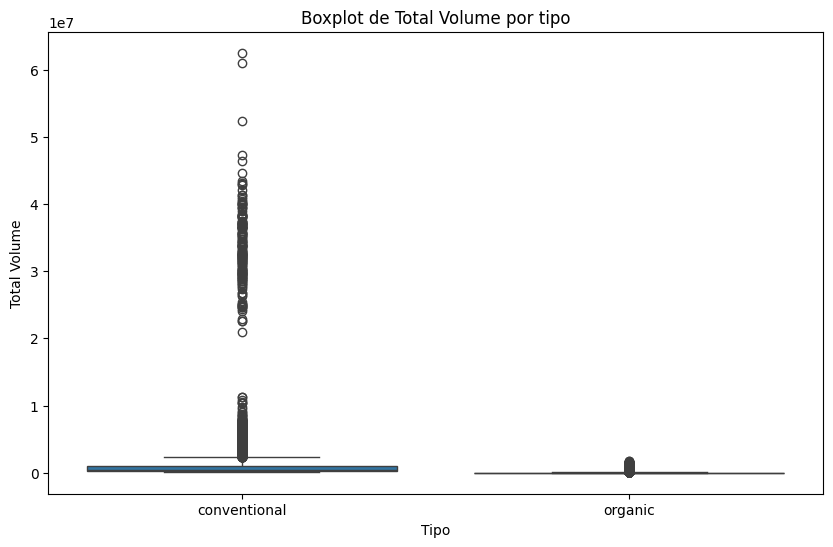

In [19]:
#boxplot de type y total volume
plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='Total Volume', data=df)
plt.title('Boxplot de Total Volume por tipo')
plt.xlabel('Tipo')
plt.ylabel('Total Volume')
plt.show()

Este boxplot compara el volumen total de ventas (Total Volume) de aguacates según su tipo: convencional y orgánico. Se observa que los aguacates convencionales tienen un volumen de ventas significativamente mayor que los orgánicos. La mediana del volumen total para los convencionales está muy por encima de la de los orgánicos, y además presenta una gran cantidad de valores atípicos con volúmenes extremadamente altos. En contraste, los aguacates orgánicos tienen un rango de distribución más estrecho y sin valores extremos tan pronunciados. Esto indica que los aguacates convencionales dominan el mercado en términos de volumen de ventas, posiblemente debido a su menor precio o mayor disponibilidad.

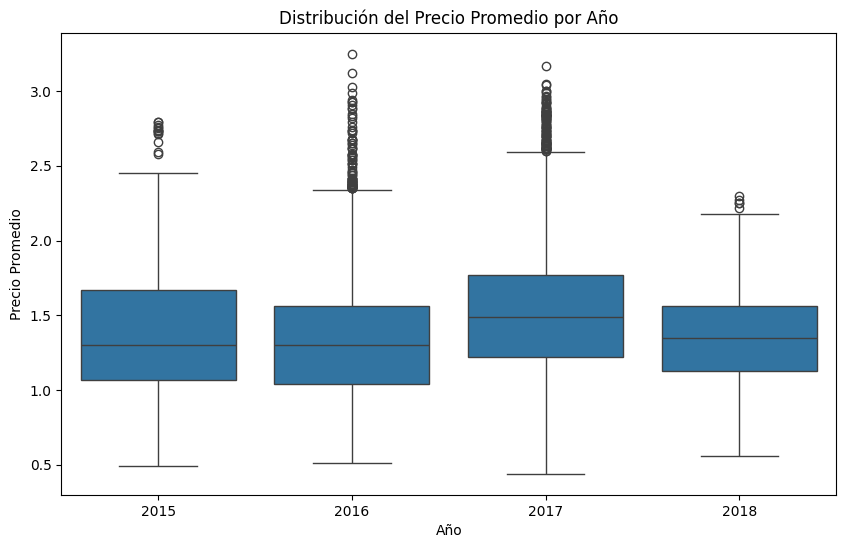

In [20]:
# boxplot de region y año
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y="AveragePrice", data=df)
plt.title("Distribución del Precio Promedio por Año")
plt.xlabel("Año")
plt.ylabel("Precio Promedio")
plt.show()


Esta gráfica muestra la distribución del precio promedio del aguacate por año entre 2015 y 2018. Se puede observar que, en general, el precio promedio ha tenido cierta estabilidad, aunque con ligeras variaciones. El año 2017 presenta una mediana más alta en comparación con los demás años, lo que indica que fue el año con los precios promedio más elevados. También se nota una mayor dispersión en ese año, con un rango intercuartílico amplio y muchos valores atípicos hacia el extremo superior. En cambio, 2018 muestra una ligera disminución en la mediana del precio promedio. Aunque hay outliers en todos los años, son especialmente frecuentes en 2016 y 2017, lo que sugiere que durante esos años hubo semanas con precios considerablemente altos.

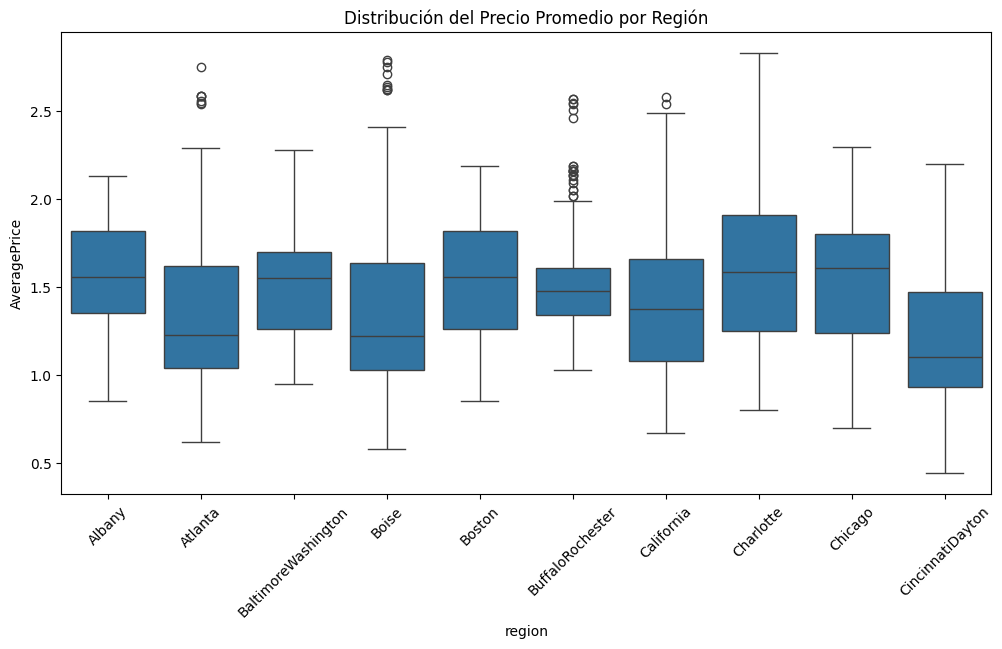

In [21]:
# boxplot de region y precio promedio
regiones_seleccionadas = df["region"].value_counts().index[:10]  # Tomar las 10 regiones con más datos
df_filtrado = df[df["region"].isin(regiones_seleccionadas)]

plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filtrado["region"], y=df_filtrado["AveragePrice"])
plt.xticks(rotation=45)
plt.title("Distribución del Precio Promedio por Región")
plt.show()

Esta gráfica muestra la distribución del precio promedio del aguacate por región, y permite observar variaciones importantes entre las distintas áreas geográficas. Regiones como Charlotte, Chicago y Boston presentan precios promedio más altos, con medianas por encima de 1.5 e incluso cerca de 2.0 en algunos casos. En contraste, regiones como CincinnatiDayton y Atlanta muestran precios más bajos, con medianas cercanas o por debajo de 1.2. La dispersión de los datos también varía por región, siendo Charlotte y California las que tienen una mayor amplitud, lo que indica una variabilidad considerable en los precios. Además, la presencia de outliers es común en la mayoría de regiones, reflejando semanas específicas con precios significativamente más altos de lo usual. 

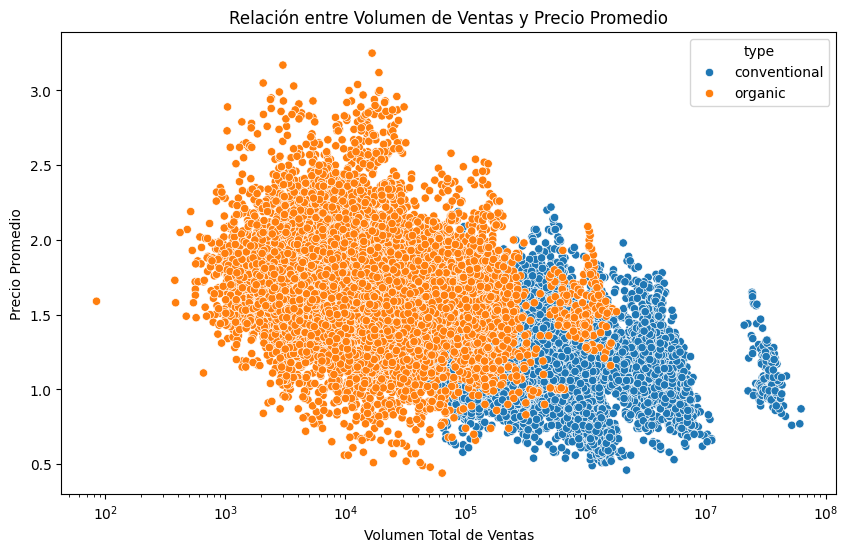

In [22]:
#scatterplot de total volume, precio promedio y tipo
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Total Volume"], y=df["AveragePrice"], hue=df["type"])
plt.xscale("log")  # Escala logarítmica para mejor visualización
plt.title("Relación entre Volumen de Ventas y Precio Promedio")
plt.xlabel("Volumen Total de Ventas")
plt.ylabel("Precio Promedio")
plt.show()


Esta gráfica de dispersión muestra la relación entre el volumen total de ventas y el precio promedio, diferenciando por tipo de aguacate: convencional (azul) y orgánico (naranja). Se observa una clara tendencia inversa entre estas dos variables: a mayor volumen de ventas, menor precio promedio, especialmente evidente en los aguacates convencionales. Los datos de aguacates convencionales se concentran en rangos de volumen mucho más altos (hasta 10⁷), con precios que tienden a ser más bajos. En contraste, los aguacates orgánicos tienen volúmenes de venta considerablemente menores, pero sus precios promedio tienden a ser más altos y dispersos. 

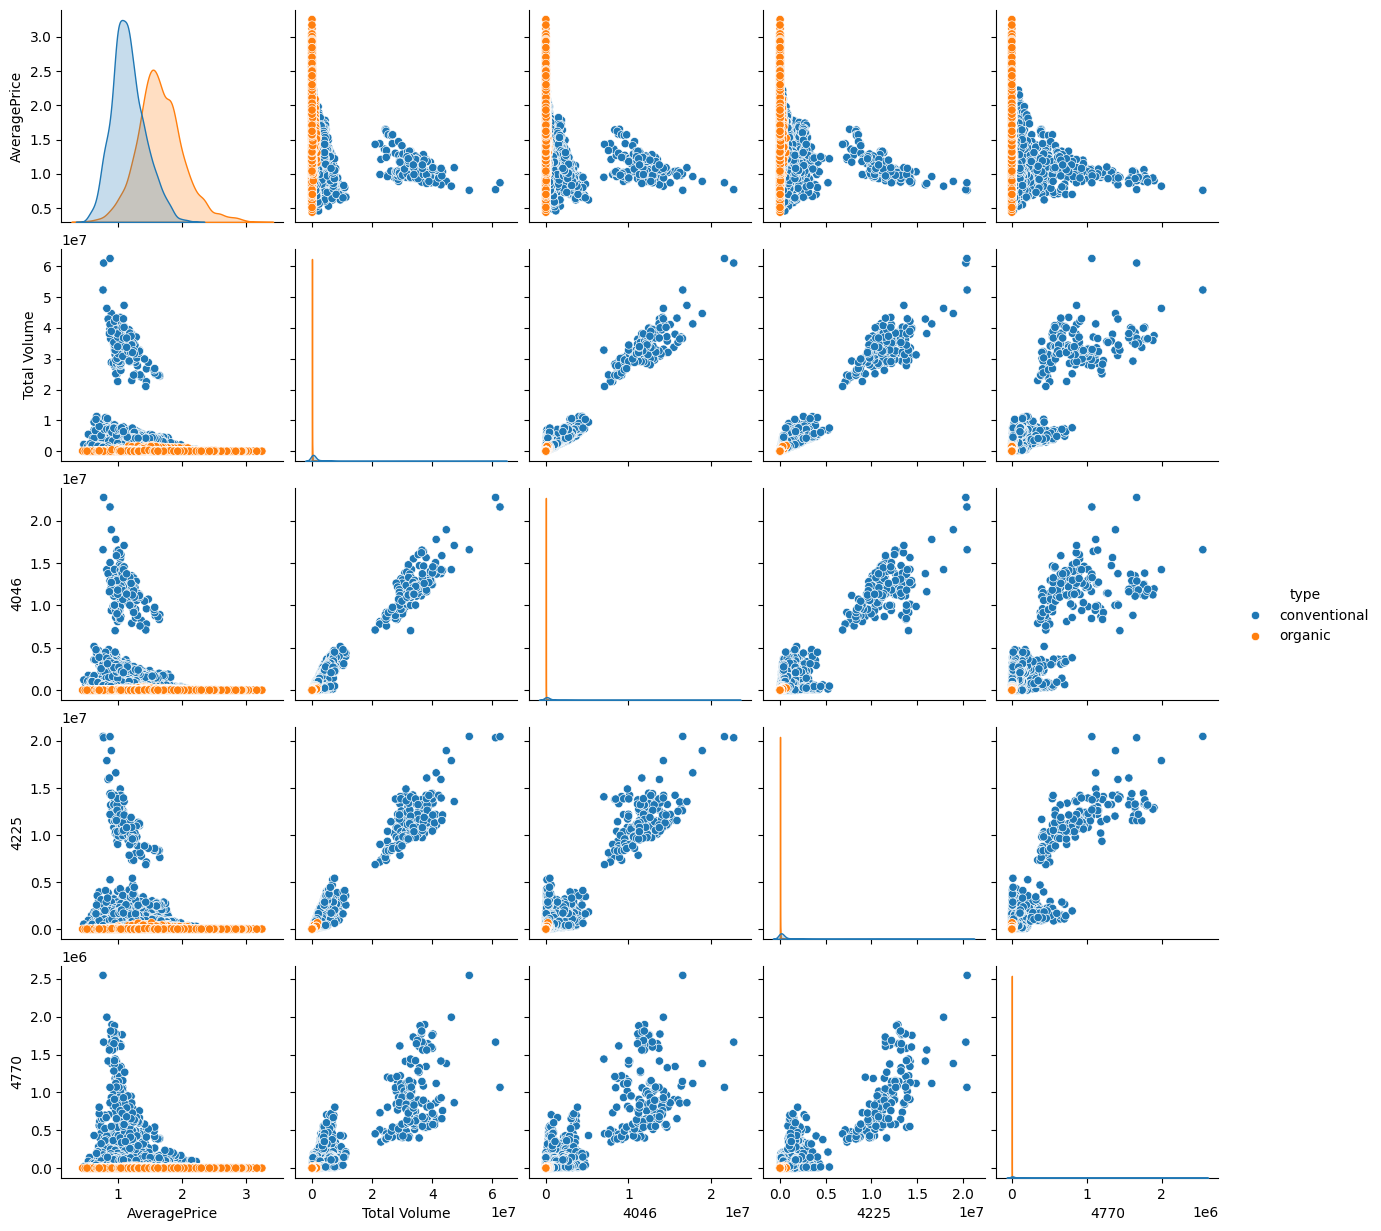

In [23]:

# Seleccionamos columnas numéricas relevantes
columnas_seleccionadas = ["AveragePrice", "Total Volume", "4046", "4225", "4770"]

# Creamos el pairplot con diferenciación por tipo de aguacate
sns.pairplot(df[columnas_seleccionadas + ["type"]], hue="type", diag_kind="kde")  
plt.show()

Las gráficas de dispersión entre variables como Total Volume, 4046, 4225 y 4770 revelan una fuerte correlación positiva, especialmente en el tipo convencional, lo que indica que cuando aumenta una categoría específica de producto, también lo hace el volumen total. En contraste, los datos de aguacates orgánicos se agrupan en un rango mucho más limitado, reflejando una menor participación en el mercado. 

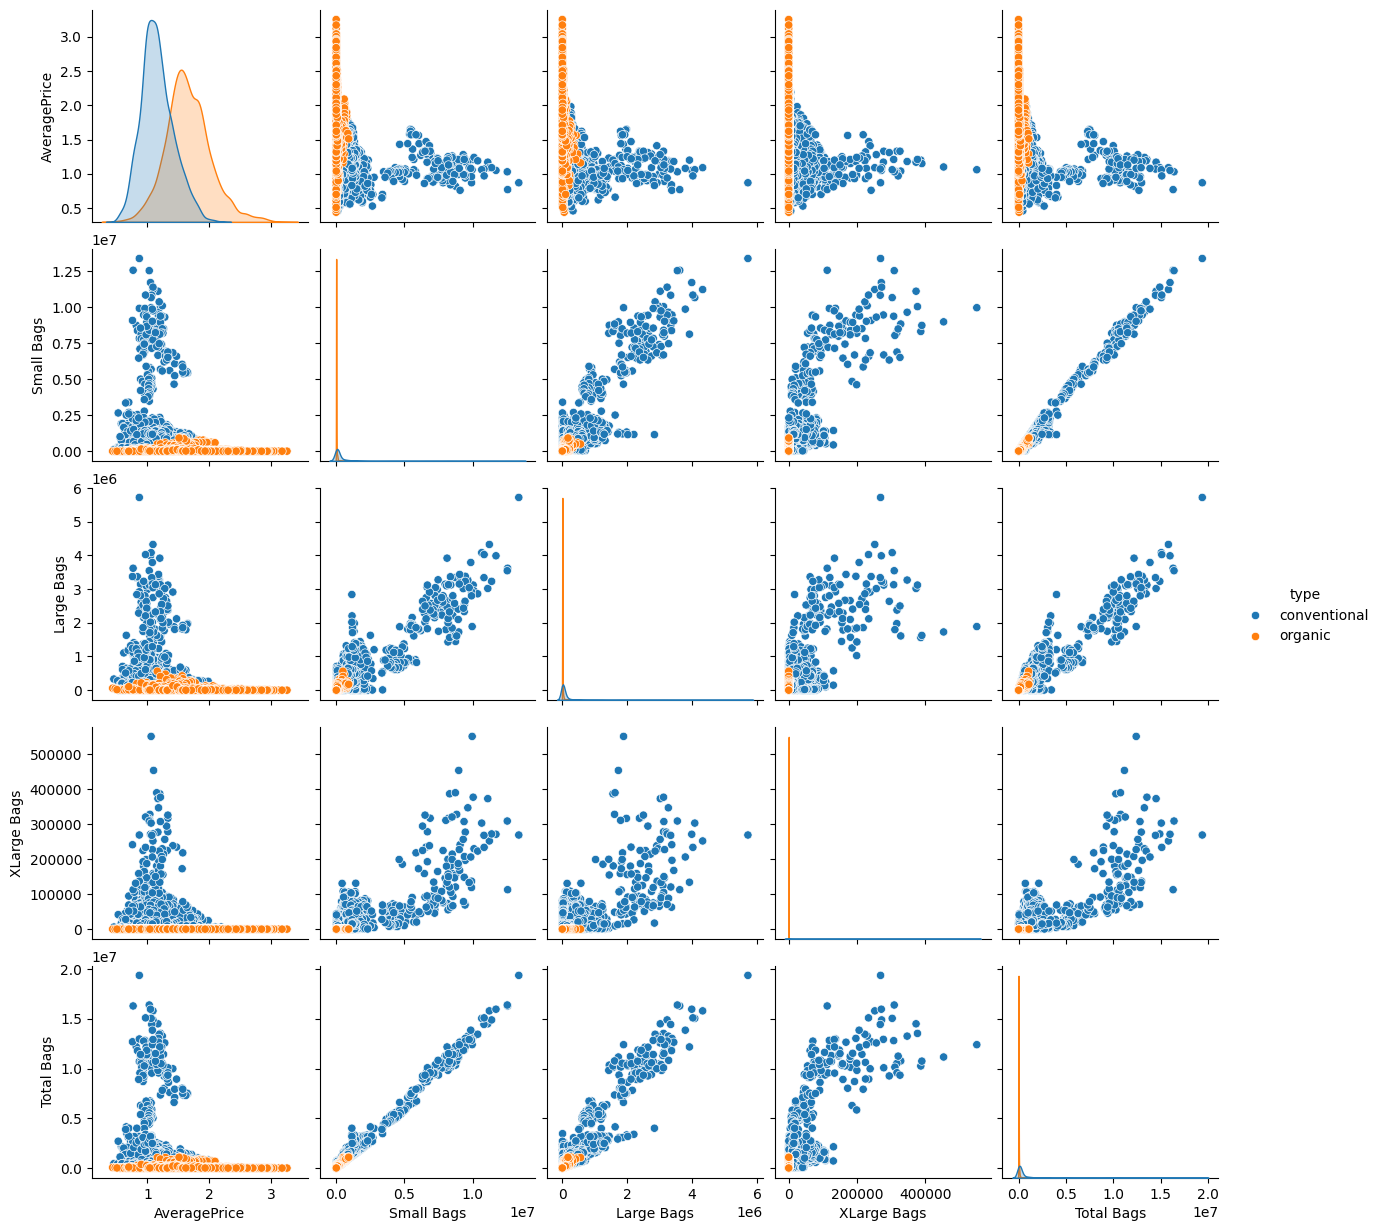

In [24]:
# Seleccionamos otro conjunto de columnas numéricas relevantes
columnas_seleccionadas = ["AveragePrice", "Small Bags", "Large Bags", "XLarge Bags", "Total Bags"]

# Creamos el pairplot con diferenciación por tipo de aguacate
sns.pairplot(df[columnas_seleccionadas + ["type"]], hue="type", diag_kind="kde")  
plt.show()

Esta gráfica de tipo pairplot muestra la relación entre el precio promedio y las diferentes categorías de bolsas utilizadas para empacar aguacates (pequeñas, grandes, extra grandes y el total), diferenciando por tipo de aguacate (convencional en azul y orgánico en naranja). Se observa que la mayoría de las observaciones corresponden al tipo convencional, con volúmenes considerablemente mayores en todas las categorías de bolsas. Hay una clara correlación positiva entre el número de bolsas y el total de bolsas, especialmente en los tipos convencionales, lo cual es lógico dado que el total es la suma de las demás categorías.

## limpieza y normalizacion

In [25]:
# Solo columnas numéricas
num_df = df.select_dtypes(include=np.number)

# Calcular Z-scores
z_scores = np.abs(stats.zscore(num_df, nan_policy='omit'))

# Umbral es 3
outliers = (z_scores > 3)

# Ver cuántos outliers hay por columna
outliers.sum(axis=0)




array([  0, 131, 171, 181, 180, 259, 187, 179, 251, 234,   0])

In [26]:
#matar outliers
df_cleaned = df[(z_scores <= 3).all(axis=1)]


In [27]:
#transformar date
df['Date'] = pd.to_datetime(df['Date'])  # convertir si aún no es datetime
df['month'] = df['Date'].dt.month
df[['Date', 'month']].head()



,Date,month
0,2015-12-27,12
1,2015-12-20,12
2,2015-12-13,12
3,2015-12-06,12
4,2015-11-29,11


## Agrupar datos por region año y mes

In [28]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)
df['type_organic'] = df['type_organic'].astype(int)

df_grouped = df.groupby(['region', 'year', 'month','type_organic']).mean(numeric_only=True).reset_index()
df_grouped.head()


,region,year,month,type_organic,index,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,Albany,2015,1,0,49.5,1.1725,42931.7850,1419.4675,31166.0600,119.2325,10227.0250,9744.3525,482.6725,0.0
1,Albany,2015,1,1,49.5,1.8450,1197.7175,29.8275,196.6250,0.0000,971.2650,971.2650,0.0000,0.0
2,Albany,2015,2,0,45.5,1.0275,52342.5600,1196.5775,41057.6625,178.9975,9909.3225,9565.9875,343.3350,0.0
3,Albany,2015,2,1,45.5,1.7625,1333.5025,23.6400,91.7200,0.0000,1218.1425,1218.1425,0.0000,0.0
4,Albany,2015,3,0,41.0,1.0620,50658.9640,1419.5020,39877.5860,134.3020,9227.5740,8852.8580,374.7160,0.0


In [29]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        4212 non-null   object 
 1   year          4212 non-null   int64  
 2   month         4212 non-null   int32  
 3   type_organic  4212 non-null   int64  
 4   index         4212 non-null   float64
 5   AveragePrice  4212 non-null   float64
 6   Total Volume  4212 non-null   float64
 7   4046          4212 non-null   float64
 8   4225          4212 non-null   float64
 9   4770          4212 non-null   float64
 10  Total Bags    4212 non-null   float64
 11  Small Bags    4212 non-null   float64
 12  Large Bags    4212 non-null   float64
 13  XLarge Bags   4212 non-null   float64
dtypes: float64(10), int32(1), int64(2), object(1)
memory usage: 444.4+ KB


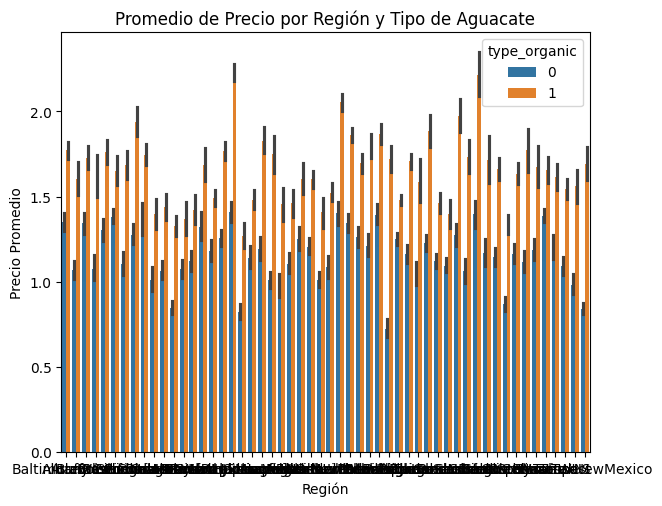

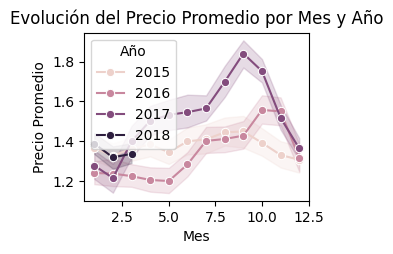

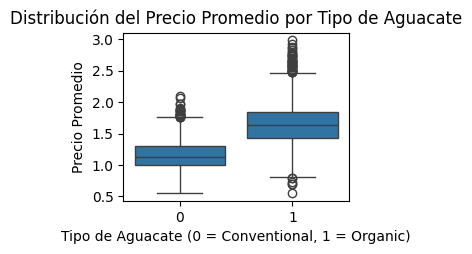

C:\Users\juanj\AppData\Local\Temp\ipykernel_23600\1500243870.py:36: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


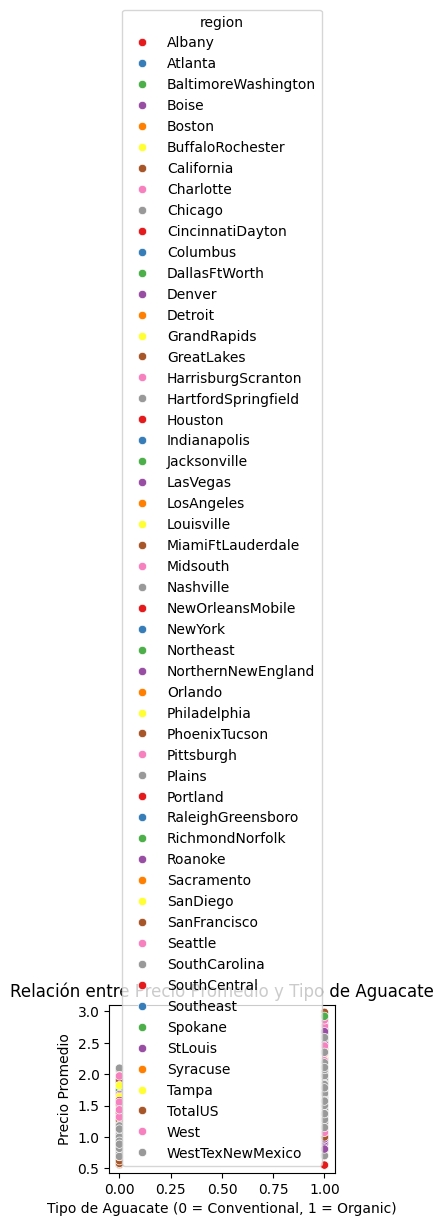

In [30]:

# Configurar el tamaño de la figura general
plt.figure(figsize=(15, 12))

# Gráfico 1: Precio promedio por región y tipo de aguacate
plt.subplot(2, 2, 1)  # 2 filas, 2 columnas, 1er gráfico
sns.barplot(x='region', y='AveragePrice', hue='type_organic', data=df_grouped)
plt.title('Promedio de Precio por Región y Tipo de Aguacate')
plt.xlabel('Región')
plt.ylabel('Precio Promedio')
plt.show()

# Gráfico 2: Evolución del precio promedio por mes y año
plt.subplot(2, 2, 2)  # 2 filas, 2 columnas, 2do gráfico
sns.lineplot(x='month', y='AveragePrice', hue='year', data=df_grouped, marker='o')
plt.title('Evolución del Precio Promedio por Mes y Año')
plt.xlabel('Mes')
plt.ylabel('Precio Promedio')
plt.legend(title='Año')
plt.show()
# Gráfico 3: Distribución del precio promedio por tipo de aguacate
plt.subplot(2, 2, 3)  # 2 filas, 2 columnas, 3er gráfico
sns.boxplot(x='type_organic', y='AveragePrice', data=df_grouped)
plt.title('Distribución del Precio Promedio por Tipo de Aguacate')
plt.xlabel('Tipo de Aguacate (0 = Conventional, 1 = Organic)')
plt.ylabel('Precio Promedio')
plt.show()

# Gráfico 4: Relación entre precio promedio y tipo de aguacate (scatterplot)
plt.subplot(2, 2, 4)  # 2 filas, 2 columnas, 4to gráfico
sns.scatterplot(x='type_organic', y='AveragePrice', data=df_grouped, hue='region', palette='Set1')
plt.title('Relación entre Precio Promedio y Tipo de Aguacate')
plt.xlabel('Tipo de Aguacate (0 = Conventional, 1 = Organic)')
plt.ylabel('Precio Promedio')

# Ajustar la disposición y mostrar todos los gráficos
plt.tight_layout()
plt.show()


## Regresion lineal


In [31]:
# separar X e y
# Definir variables predictoras (X) y variable objetivo (y)
X = df_grouped.drop(columns=['AveragePrice'])
y = df_grouped['AveragePrice']

# la region ahora seran numeros
# Convertir la columna 'region' a variables dummy
X = pd.get_dummies(X, columns=['region'], drop_first=True)

#normalizar x
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Separar en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo con X_train y y_train
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Crear DataFrame con los resultados
df_pred = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Error': y_test - y_pred
})

# Calcular el porcentaje de error
df_pred['porcentaje'] = (abs(df_pred['Error']) / df_pred['Actual']) * 100

# Asegurarnos que los valores negativos de Error sean positivos (ya lo hicimos con abs en Percentage_Error)
df_pred['Error'] = abs(df_pred['Error'])

# Mostrar la tabla con los resultados
df_pred




,Actual,Predicted,Error,porcentaje
643,1.7175,1.798547,0.081047,4.718911
166,1.1650,1.211106,0.046106,3.957639
1444,0.8175,0.840751,0.023251,2.844099
1877,1.7640,1.543387,0.220613,12.506398
463,1.1900,1.699466,0.509466,42.812300
...,...,...,...,...
3470,1.1175,1.189259,0.071759,6.421386
654,1.1050,1.255221,0.150221,13.594705
2578,0.6600,0.874337,0.214337,32.475336
1551,1.4575,1.737174,0.279674,19.188622


In [32]:
df_pred.describe()

,Actual,Predicted,Error,porcentaje
count,843.000000,843.000000,843.000000,843.000000
mean,1.398749,1.402477,0.172834,12.956105
std,0.386176,0.310547,0.148418,11.686914
min,0.562500,0.689087,0.000070,0.006139
25%,1.103250,1.150612,0.066743,4.670543
50%,1.357500,1.395278,0.140351,10.028797
75%,1.647750,1.636086,0.238108,17.374870
max,2.982500,2.245128,1.152676,78.041506


## Reduccion de dimensionalidad con PCA

In [33]:
# Selección de variables
features = ['AveragePrice', 'Total Volume', '4046', '4225', '4770']
X = df[features]

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

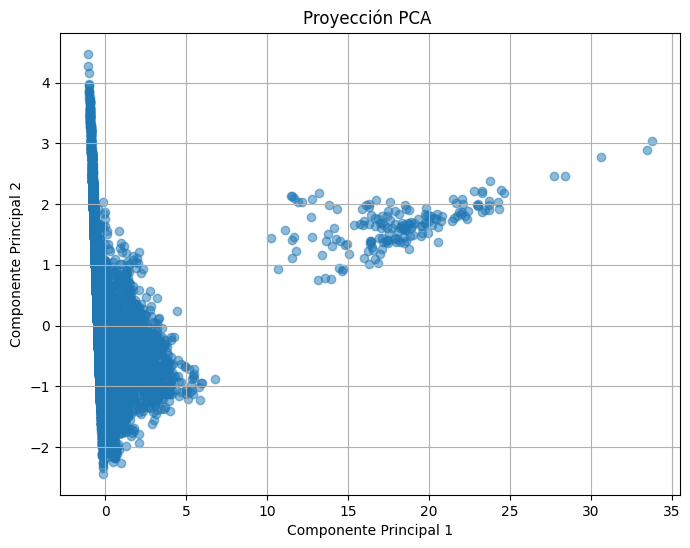

In [34]:
# Gráfico PCA 
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('Proyección PCA ')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

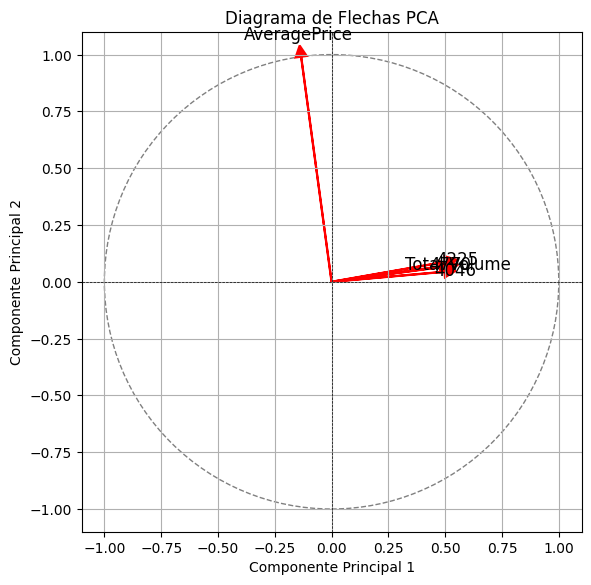

In [35]:
# Paso 4: Diagrama de Flechas PCA 
plt.figure(figsize=(6, 6))
components = pca.components_.T  # Transpuesta para tener [n_features x 2]

# Círculo de referencia
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='dashed')
plt.gca().add_patch(circle)

# Flechas y nombres de variables
for i, (x, y) in enumerate(zip(components[:, 0], components[:, 1])):
    plt.arrow(0, 0, x, y, head_width=0.05, head_length=0.05,
              linewidth=1.5, color='red')
    plt.text(x * 1.1, y * 1.1, features[i],
             fontsize=12, color='black', ha='center', va='center')

# Estética del gráfico
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Diagrama de Flechas PCA")
plt.axhline(0, color='black', linestyle='dashed', linewidth=0.5)
plt.axvline(0, color='black', linestyle='dashed', linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

In [36]:
# Elegimos k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster_KMeans'] = clusters

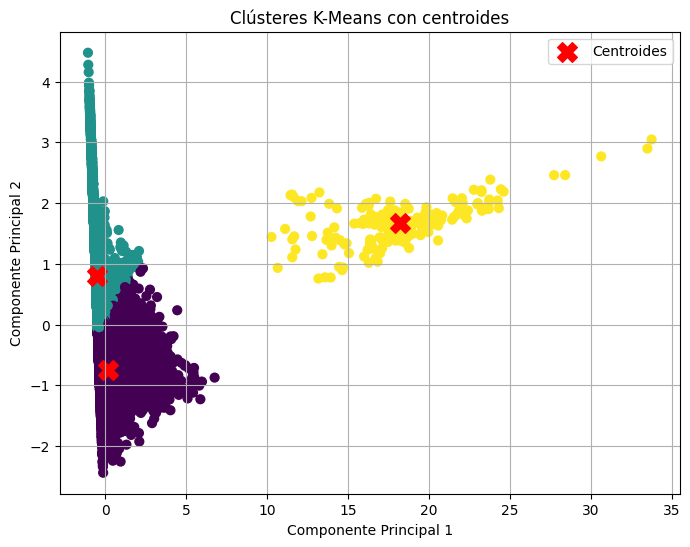

In [37]:
centroids = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=40)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clústeres K-Means con centroides')
plt.legend()
plt.grid(True)
plt.show()


### Caracteristicas de cada uno de los cluster

In [38]:
# Promedio de características por clúster
cluster_means = df.groupby('Cluster_KMeans')[features].mean()

El mapa de calor nos permitira notar rápidamente qué clúster tiene los valores más altos o bajos de ciertas características

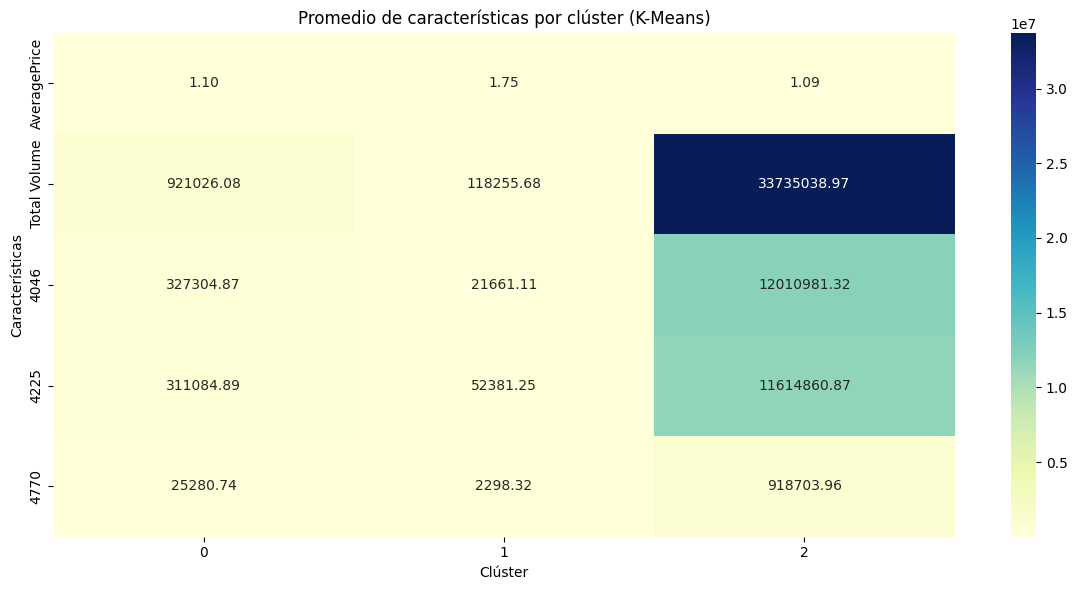

In [39]:
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means.T, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Promedio de características por clúster (K-Means)")
plt.xlabel("Clúster")
plt.ylabel("Características")
plt.tight_layout()
plt.show()

### Evaluacion del modelo

Silhouette Score	Cerca de 1 indica 	Buen agrupamiento

Davies-Bouldin Index	Cerca de 0	indica Buena separación

In [40]:
# Silhouette Score
silhouette = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {silhouette:.3f}")

# Davies-Bouldin Index
dbi = davies_bouldin_score(X_scaled, clusters)
print(f"Davies-Bouldin Index: {dbi:.3f}")

Silhouette Score: 0.451
Davies-Bouldin Index: 0.667


## Modelo GMM

In [41]:
# Aplicar GMM con el mismo número de clusters que usamos con KMeans
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Agregar los clusters al DataFrame
df['Cluster_GMM'] = gmm_labels

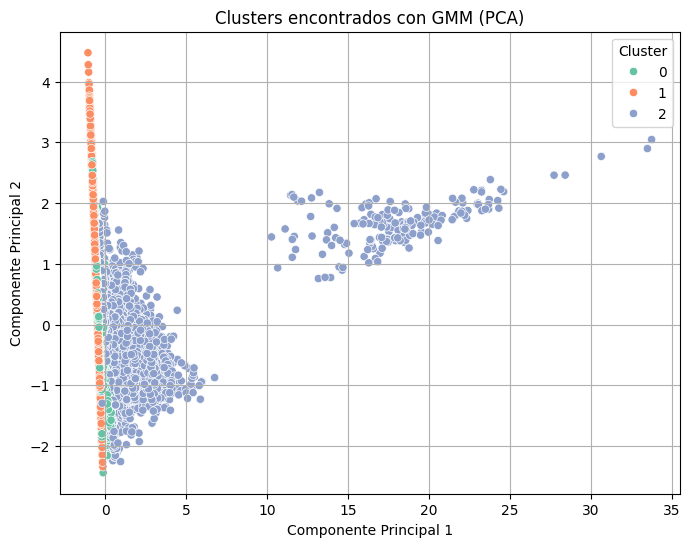

In [42]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=gmm_labels, palette='Set2')
plt.title("Clusters encontrados con GMM (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


### Evaluacion del modelo

In [43]:
print("Evaluación GMM:")
print(f"Silhouette Score: {silhouette_score(X_scaled, gmm_labels):.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X_scaled, gmm_labels):.3f}")

Evaluación GMM:
Silhouette Score: 0.128
Davies-Bouldin Index: 1.370


### Caracteristicas del modelo GMM

<Figure size 1000x600 with 0 Axes>

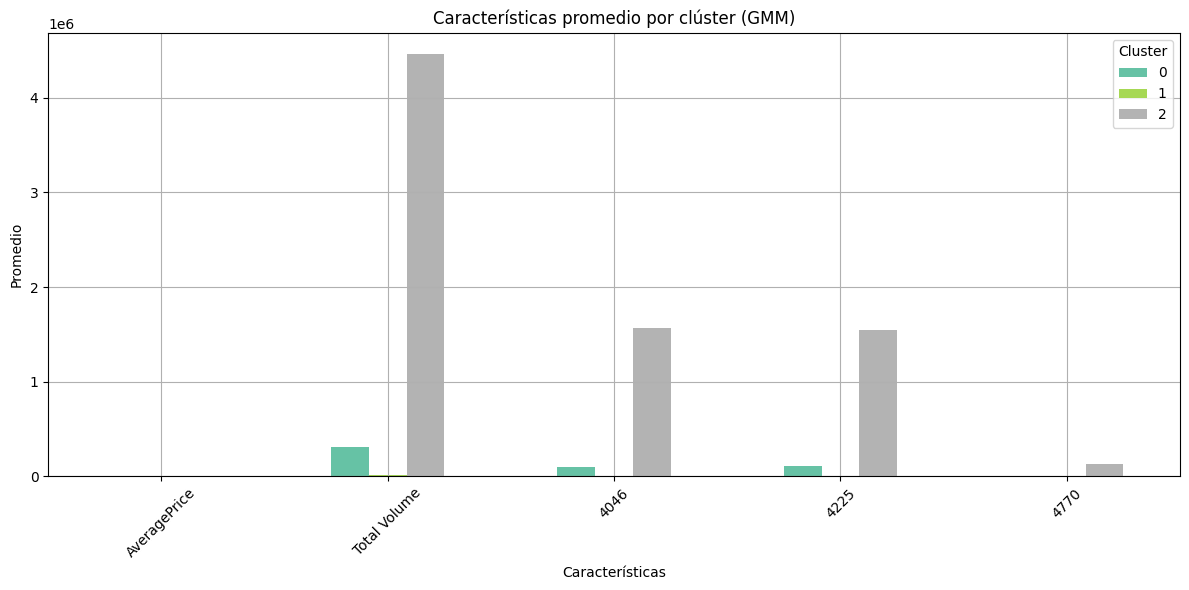

In [44]:
# Agrupar por cluster y obtener medias
gmm_characteristics = df.groupby('Cluster_GMM')[X.columns].mean()

# Barplot para comparar características promedio por cluster (GMM)
plt.figure(figsize=(10, 6))
gmm_characteristics.T.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title("Características promedio por clúster (GMM)")
plt.xlabel("Características")
plt.ylabel("Promedio")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title="Cluster")
plt.show()

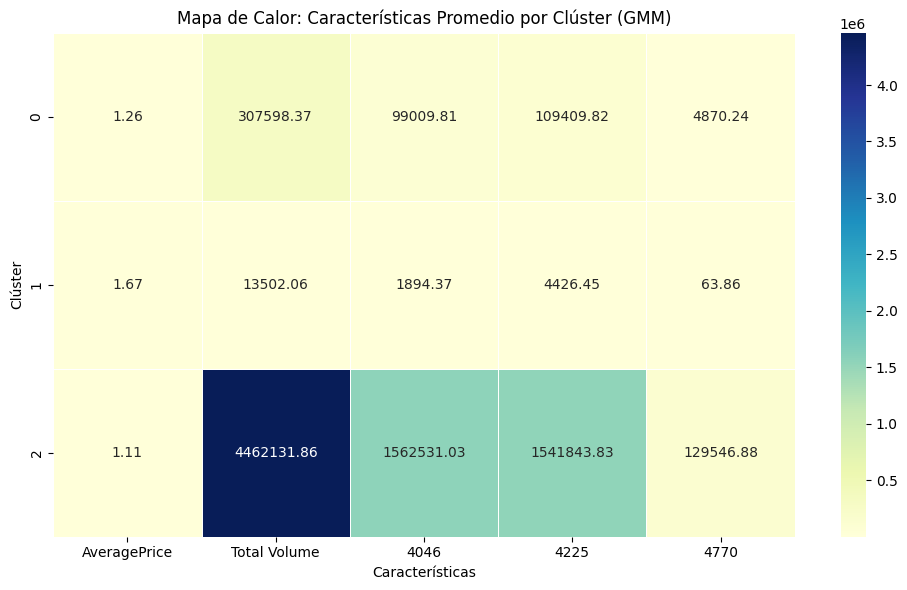

In [45]:
# Agrupar por clúster GMM y calcular la media de las características originales
gmm_means = df.groupby('Cluster_GMM')[X.columns].mean()

# Crear mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(gmm_means, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("Mapa de Calor: Características Promedio por Clúster (GMM)")
plt.xlabel("Características")
plt.ylabel("Clúster")
plt.tight_layout()
plt.show()

## Modelo DBSCAN

In [46]:
# Ajustar el modelo DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Puedes ajustar eps y min_samples
dbscan_labels = dbscan.fit_predict(X_scaled)

# Agregar al DataFrame
df['Cluster_DBSCAN'] = dbscan_labels

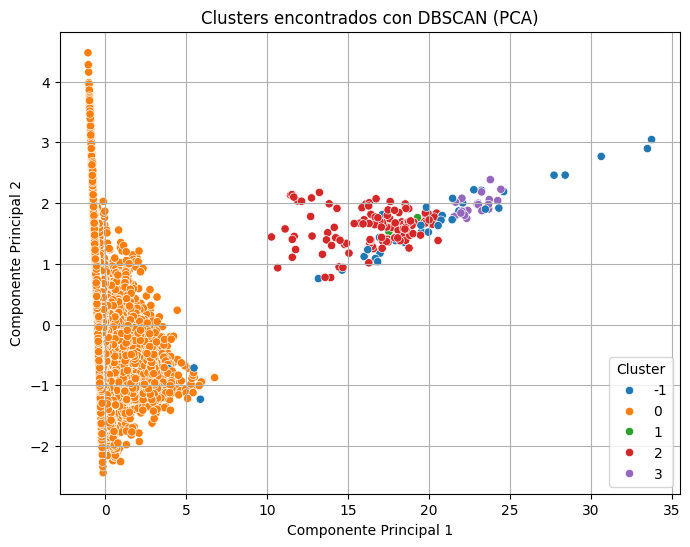

In [47]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette='tab10')
plt.title("Clusters encontrados con DBSCAN (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


### Evaluacion del modelo

In [48]:
# Solo calcular si hay más de un clúster distinto de -1 (ruido)
if len(set(dbscan_labels)) > 1 and -1 in dbscan_labels:
    silhouette = silhouette_score(X_scaled, dbscan_labels)
    dbi = davies_bouldin_score(X_scaled, dbscan_labels)
    print("Evaluación DBSCAN:")
    print(f"Silhouette Score: {silhouette:.3f}")
    print(f"Davies-Bouldin Index: {dbi:.3f}")
else:
    print("DBSCAN no encontró suficientes clústeres válidos para evaluar.")


Evaluación DBSCAN:
Silhouette Score: 0.907
Davies-Bouldin Index: 1.725


### Caracteristicas del modelo

<Figure size 1000x600 with 0 Axes>

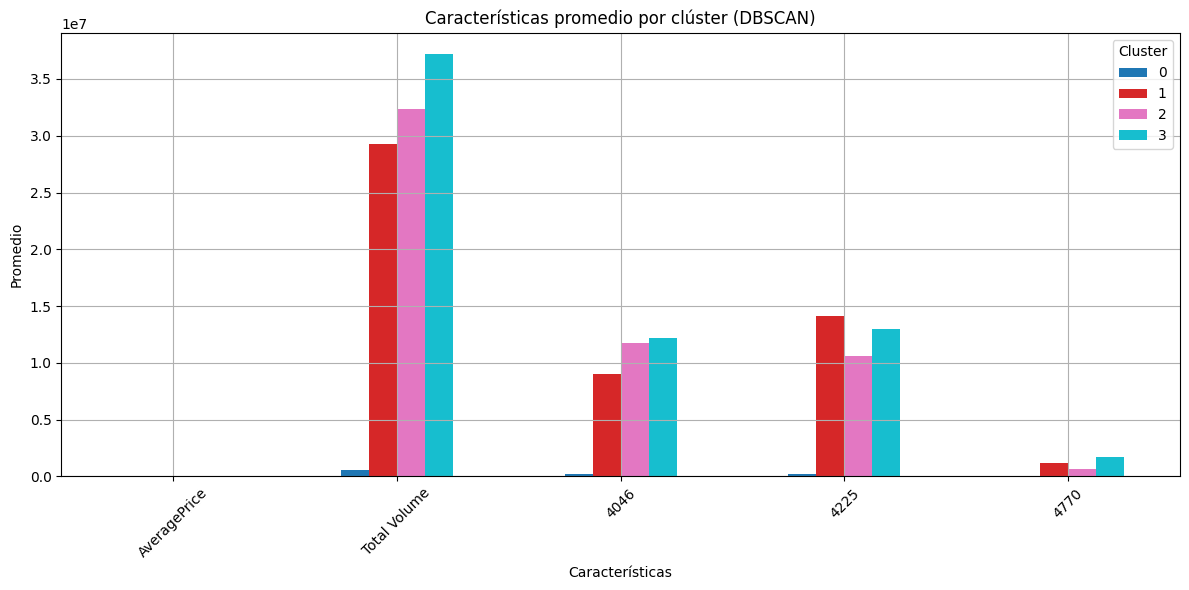

In [49]:
# Filtramos solo los puntos que no son ruido (-1)
df_dbscan_clean = df[df['Cluster_DBSCAN'] != -1]

# Agrupar por cluster y obtener medias
dbscan_characteristics = df_dbscan_clean.groupby('Cluster_DBSCAN')[X.columns].mean()

# Barplot para comparar características promedio por cluster (DBSCAN)
plt.figure(figsize=(10, 6))
dbscan_characteristics.T.plot(kind='bar', figsize=(12, 6), colormap='tab10')
plt.title("Características promedio por clúster (DBSCAN)")
plt.xlabel("Características")
plt.ylabel("Promedio")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title="Cluster")
plt.show()


### Random Forest Regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor  # Ensure the required class is imported

# Asegurarse de que forest_model esté definido
forest_model = RandomForestRegressor(random_state=42)

# Redefinir X_train y y_train si no están definidos
X = df_grouped.drop(columns=['AveragePrice'])
y = df_grouped['AveragePrice']

# Convertir la columna 'region' a variables dummy
X = pd.get_dummies(X, columns=['region'], drop_first=True)

# Normalizar X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separar en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo RandomForestRegressor
forest_model.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred_forest = forest_model.predict(X_test)

# Calcular métricas de evaluación
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f"Mean Squared Error (MSE): {mse_forest:.3f}")
print(f"R-squared (R2): {r2_forest:.3f}")

Mean Squared Error (MSE): 0.019
R-squared (R2): 0.872



### Análisis del Random Forest Regressor


    - El modelo Random Forest Regressor mostró un desempeño razonable en la predicción de los precios promedio de los aguacates (`AveragePrice`).
    - Las predicciones (`y_pred_forest`) están en un rango lógico y cercano a los valores reales (`y_test`), lo que indica que el modelo captura bien las relaciones entre las variables predictoras y la variable objetivo.


### Redes neuronales

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Crear el modelo de red neuronal
model_nn = Sequential()

# Capa de entrada y primera capa oculta
model_nn.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Segunda capa oculta
model_nn.add(Dense(64, activation='relu'))

# Capa de salida
model_nn.add(Dense(1, activation='linear'))

# Compilar el modelo
model_nn.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

# Entrenar el modelo
history = model_nn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# Evaluar el modelo
loss, mse = model_nn.evaluate(X_test, y_test, verbose=0)
print(f"Mean Squared Error (MSE): {mse:.3f}")

# Hacer predicciones
y_pred_nn = model_nn.predict(X_test)

# Crear DataFrame con los resultados
df_pred_nn = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_nn.flatten(),
    'Error': y_test - y_pred_nn.flatten()
})

df_pred_nn.head()

c:\Users\juanj\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 10278606848.0000 - mean_squared_error: 10278606848.0000 - val_loss: 422692896.0000 - val_mean_squared_error: 422692896.0000
Epoch 2/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 622744704.0000 - mean_squared_error: 622744704.0000 - val_loss: 98896400.0000 - val_mean_squared_error: 98896400.0000
Epoch 3/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 99940040.0000 - mean_squared_error: 99940040.0000 - val_loss: 321354912.0000 - val_mean_squared_error: 321354912.0000
Epoch 4/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 641617536.0000 - mean_squared_error: 641617536.0000 - val_loss: 43134872.0000 - val_mean_squared_error: 43134872.0000
Epoch 5/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1961134592.0000 - mean_squared_error: 1961134592.0000 - val_loss: 5222827520.0000 - val_mean_squared_error: 5222827520.0000
Epoch 6/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4774659072.0000 - mean_squared_error: 

,Actual,Predicted,Error
643,1.7175,102.444099,-100.726599
166,1.1650,-300.065704,301.230704
1444,0.8175,-151.307281,152.124781
1877,1.7640,-26.738621,28.502621
463,1.1900,-27.084709,28.274709


### Análisis de la Red Neuronal


    - Los valores predichos por la red neuronal (`y_pred_nn`) muestran una gran dispersión y valores extremos, tanto positivos como negativos, que no tienen sentido en el contexto del problema (predecir precios promedio de aguacates). Por ejemplo, algunos valores predichos son negativos o extremadamente altos, lo cual no es realista para precios.
    - Esto contrasta con los valores reales (`y_test`), que están en un rango razonable y esperado para precios promedio de aguacates.





### Conclusiones y posibles mejoras


1. **Conclusiones**:
    - Los precios promedio de los aguacates están influenciados por factores como el tipo (convencional u orgánico), la región y el volumen total de ventas.
    - Los modelos de agrupamiento (K-Means, GMM y DBSCAN) identificaron patrones interesantes en los datos, aunque algunos métodos, como DBSCAN, tuvieron dificultades para encontrar clústeres significativos.
    - Los modelos de regresión lineal y Random Forest mostraron un desempeño razonable en la predicción de precios promedio, aunque el modelo de red neuronal presentó resultados inconsistentes, posiblemente debido a problemas de configuración o datos insuficientemente normalizados.

2. **Posibles mejoras**:
    - **Optimización de hiperparámetros**: Realizar una búsqueda más exhaustiva de hiperparámetros para modelos como Random Forest, redes neuronales y algoritmos de agrupamiento podría mejorar el rendimiento.
    - **Balanceo de datos**: Si los datos están desbalanceados (por ejemplo, más datos de un tipo de aguacate que de otro), técnicas como sobremuestreo o submuestreo podrían ayudar a mejorar la calidad de los modelos.
    - **Validación cruzada**: Implementar validación cruzada para evaluar de manera más robusta el desempeño de los modelos predictivos.
    - **Mejor preprocesamiento**: Revisar y ajustar el preprocesamiento de datos, como la normalización y el manejo de outliers, para garantizar que los modelos reciban datos óptimos.
    - **Exploración de modelos adicionales**: Probar otros algoritmos de predicción y agrupamiento, como XGBoost o clustering jerárquico, para comparar resultados.
    - **Interpretabilidad de modelos**: Utilizar herramientas como SHAP o LIME para interpretar mejor los modelos y entender las contribuciones de las variables predictoras.


